In [80]:
%matplotlib inline

Data analysis process for the titanic data.

Step 1 : Data collection

Data here is already collected in a csv which would be the input to this project.


In [81]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

titanic_data_org = pd.read_csv("/Users/indur/Downloads/titanic_data.csv")



Step 2 : Data cleaning

1.Looking at the data, I can see that for a few people in the data set, age is missing which is filled as NAN. 

For this project, I would like to fill missing age with  mean age (which is just an assumption and not computed with any detailed algotithm).


In [82]:
mean_age = titanic_data_org["Age"].dropna().mean()
titanic_data_org["Age"] = titanic_data_org["Age"].fillna(mean_age)


2.Rearrange names in a common addressable format for easy readability since there are multiple formats in which the names are represented.

In [83]:
def rearrange_name(str):
    arr = str.split(",")
    if len(arr) == 2:
        return arr[1] + " " + arr[0]
    elif len(arr) == 1:
        return str
   
titanic_data_org["Name"] = titanic_data_org["Name"].apply(rearrange_name)


3.Some of the passengers have a fare 0 against them. Since it could be valid (for some reason, they got a free trip) , the analysis will include them as passengers who actually paid nothing for the trip.

3.Analysis of data:
    
    Questions :
        1. Did age have a role to play in whether a passenger escaped ?
        2. What was the average fare paid across the different classes ?
        3. What was the distribution of surival rate based on embarkment ?
        4. Who had better chance of survival? Males/Females ?
        5. What factors made people more likely to survive?
        
The following section will try to answer most of the questions posted above.

Did age have a role to play in whether a passenger escaped ?
To do this, I assume that if we see a strong correlation between a person age and survival , then we can assume that age has a role to play .



In [84]:
age_series =  titanic_data_org['Age']

survived_series =  titanic_data_org['Survived']
p_r = age_series.corr(survived_series,method='pearson')

print p_r

-0.0698085152871


Since pearsons r is -0.07 . 
Since the value is very close to 0, there is very little negative correlation between age and survival. This is is so small, we can assume solely on this calculation and (previously filled mean ages for missing ages)  that age had no role to play in increasing a persons chance to escape.

What was the average fare paid across the different classes ?


Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


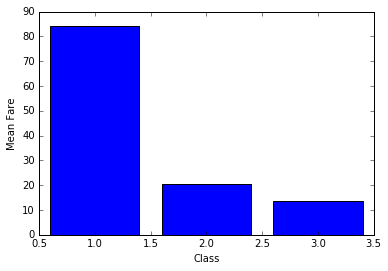

In [111]:
pclass_mean_far = titanic_data_org.groupby(['Pclass'])['Fare'].mean()
print pclass_mean_far

pclass = pclass_mean_far.index.get_level_values('Pclass')
mean_fares =  pclass_mean_far.values

#print pclass
#print mean_fares
plt.bar(pclass,mean_fares,align='center')
plt.ylabel('Mean Fare')
plt.xlabel('Class')


On an average , passengers paid about 
$84.15 for class 1 
$20.66 for class 2 
$13.68 for class 3

What was the distribution of surival rate based on embarkment ?

In [67]:

emd_data = titanic_data_org.groupby(['Embarked','Survived'])['PassengerId'].count()
#print emd_data

for value in emd_data.index.get_level_values('Embarked').unique():
    print("Survival rate of people who embarked from {} is {}%".format(value, (emd_data.ix[value][1] * 100) / ( emd_data.ix[value][0] + emd_data.ix[value][1])))


Survival rate of people who embarked from C is 55%
Survival rate of people who embarked from Q is 38%
Survival rate of people who embarked from S is 33%


Who had better chance of survival? Males/Females ?

In [69]:
gender_data = titanic_data_org.groupby(['Sex','Survived'])['PassengerId'].count()

for value in gender_data.index.get_level_values('Sex').unique():
    print("Survival rate of  {} is {}%".format(value, (gender_data.ix[value][1] * 100) / ( gender_data.ix[value][0] + gender_data.ix[value][1])))


Survival rate of  female is 74%
Survival rate of  male is 18%


We can assume that females had a better chance of survival just based on the above calculations. This result is There might be a lot of other variables that might influence this decision but are not considered in the calculation above.

What factors made people more likely to survive?

Based on the answers to the questions answered aboved, we can say  the following : 
1. Age did not influence did not aid in increasing survival chances.
2. Females survived more than men in terms of number of people.

